# **MUHAMMAD ALIF ALFARIZI**

#### **1494037162101-564**

Importing all necessary library

In [ ]:
import pandas as pd
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


Cleaning the dataset

In [ ]:
df.drop(['filename', 'title'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   content   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


Handling categorical data

In [ ]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['category'])

In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2225 non-null   object
 1   business       2225 non-null   uint8 
 2   entertainment  2225 non-null   uint8 
 3   politics       2225 non-null   uint8 
 4   sport          2225 non-null   uint8 
 5   tech           2225 non-null   uint8 
dtypes: object(1), uint8(5)
memory usage: 28.4+ KB


Splitting the dataset and preparing text data

In [ ]:
contents = df_baru['content'].values
label = df_baru[['business', 'entertainment', 'politics', 
                 'sport', 'tech']].values
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

Train the Model and use the Tokenizer function

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

contents_latih, contents_test, label_latih, label_test = train_test_split(contents, label, test_size=0.2)

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(contents_latih)
tokenizer.fit_on_texts(contents_test)

sequence_latih = tokenizer.texts_to_sequences(contents_latih)
sequence_test = tokenizer.texts_to_sequences(contents_test)

padded_latih = pad_sequences(sequence_latih)
padded_test = pad_sequences(sequence_test)

Implementing Sequential Model, Embedding, and LSTM in the model architecture along with Dropout and Regularizers to avoid Overfitting

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Implementing Callbacks on Epochs

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.8):
      print('\nAkurasi telah mencapai target')
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, batch_size=64, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
28/28 - 11s - loss: 1.9211 - accuracy: 0.2674 - val_loss: 1.4435 - val_accuracy: 0.3708 - 11s/epoch - 397ms/step
Epoch 2/30
28/28 - 3s - loss: 1.3590 - accuracy: 0.3978 - val_loss: 1.6995 - val_accuracy: 0.3708 - 3s/epoch - 115ms/step
Epoch 3/30
28/28 - 3s - loss: 1.2532 - accuracy: 0.4348 - val_loss: 1.3081 - val_accuracy: 0.4045 - 3s/epoch - 115ms/step
Epoch 4/30
28/28 - 3s - loss: 1.1326 - accuracy: 0.4725 - val_loss: 1.2883 - val_accuracy: 0.4539 - 3s/epoch - 115ms/step
Epoch 5/30
28/28 - 3s - loss: 1.0396 - accuracy: 0.5449 - val_loss: 1.3681 - val_accuracy: 0.4045 - 3s/epoch - 117ms/step
Epoch 6/30
28/28 - 3s - loss: 0.8810 - accuracy: 0.6112 - val_loss: 1.2177 - val_accuracy: 0.4989 - 3s/epoch - 116ms/step
Epoch 7/30
28/28 - 3s - loss: 0.8122 - accuracy: 0.6371 - val_loss: 1.2036 - val_accuracy: 0.5348 - 3s/epoch - 116ms/step
Epoch 8/30
28/28 - 3s - loss: 0.7219 - accuracy: 0.6820 - val_loss: 1.5635 - val_accuracy: 0.4719 - 3s/epoch - 114ms/step
Epoch 9/30
28/28 - 3s 

Visualize the model performance

In [ ]:
import matplotlib.pyplot as plt

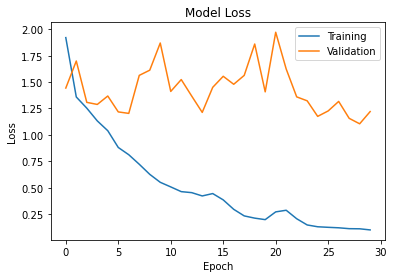

In [ ]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

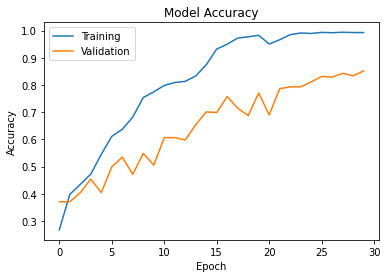

In [ ]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()